# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [2]:
data.shape

(3864, 19)

In [3]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [4]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

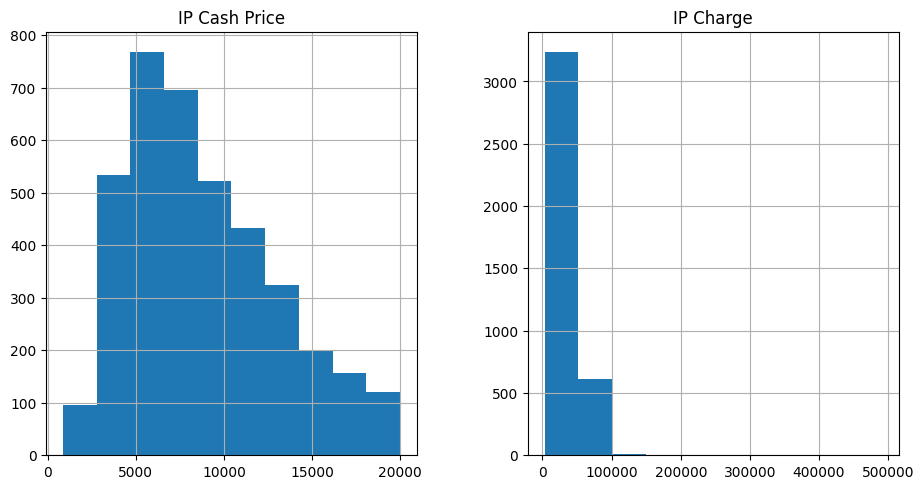

In [5]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

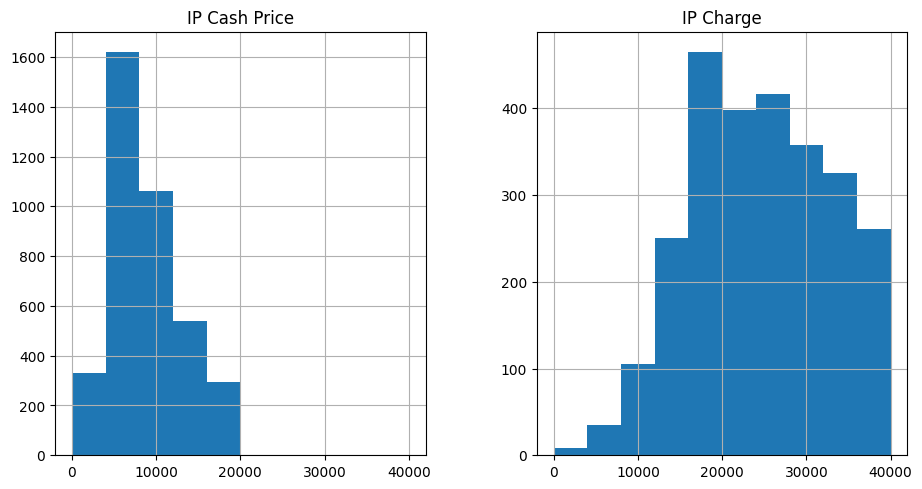

In [6]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [7]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

The above Histograms provide a visual representation of the frequency distributions of IP Cash Price and IP Charge.   
1. The IP Cash Price exhibits a distribution that is skewed to the right and has a single mode, with the highest frequency occurring between $5,000 and $10,000.   The majority of the numbers are clustered below $20,000, with only a small number of outliers exceeding this threshold.   Most cash prices paid directly by patients tend to be towards the lower range.

2. The IP Charge exhibits a far broader distribution, encompassing costs that span from $ 0 to  $ 60,000.   It has a right-skewed distribution, although to a lesser extent than IP Cash Price.   There is a prominent peak in the range of $10,000-$20,000, although the distribution exhibits a more pronounced concentration of values towards the higher end.   Although the majority of charges are below 20000 USD there is a notable proportion of charges above
$40000

Upon comparing the two distributions, it becomes evident that the IP Cash Price generally exhibits a lower value than the IP Charge.   The rates paid by patients themselves tend to be concentrated at the lower end, but charges invoiced to insurance encompass a wider range.   This is likely due to insurance companies engaging in negotiations to secure lower prices compared to the hospital's standard charges.   The histograms depict the disparities in pricing.

---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

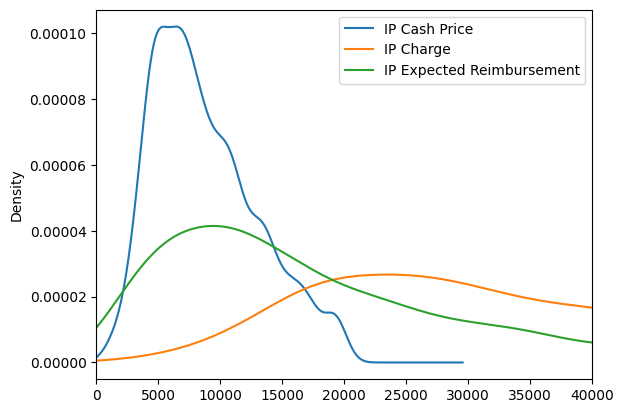

In [8]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

The above KDE plot provides a visual representation of the entire distribution of IP Expected Reimbursement in relation to the other pricing variables.   The distribution appears to be concentrated on the left side, with a noticeable peak between $5,000-$15,000.   It seems that the majority of reimbursement amounts fall towards the lower end of the overall range.

Considering the IP Charge as the maximum billable amount, it is reasonable to anticipate a lower reimbursement amount if insurance companies negotiate discounted rates. This is clearly illustrated by the KDE plot.   The majority of the reimbursement distribution is significantly lower than the peaks for IP Charge and IP Cash Price.

In addition, it seems that the distribution of reimbursements is skewed towards the right compared to the IP Cash Price.   It appears that insurance reimbursement results in a larger portion of the total charges remaining unpaid when compared to the cash price amounts.

In general, the KDE demonstrates how insurance companies pay providers significantly less than their set charges, only reimbursing a fraction of the IP Charges based on negotiated contract rates.   This enables insurance companies to achieve substantial savings on care expenses.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [9]:
data['Payer'].value_counts()

ALLWELL [15100]                      650
ARKANSAS TOTAL CARE [40700]          650
AETNA [65000]                        641
AR BLUE CROSS BLUE SHIELD [25001]    641
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: Payer, dtype: int64

In [10]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        Axes(0.125,0.11;0.775x0.77)
ALLWELL [15100]                      Axes(0.125,0.11;0.775x0.77)
AR BLUE CROSS BLUE SHIELD [25001]    Axes(0.125,0.11;0.775x0.77)
ARKANSAS TOTAL CARE [40700]          Axes(0.125,0.11;0.775x0.77)
HEALTHSCOPE [95700]                  Axes(0.125,0.11;0.775x0.77)
MULTIPLAN                            Axes(0.125,0.11;0.775x0.77)
Name: IP Expected Reimbursement, dtype: object

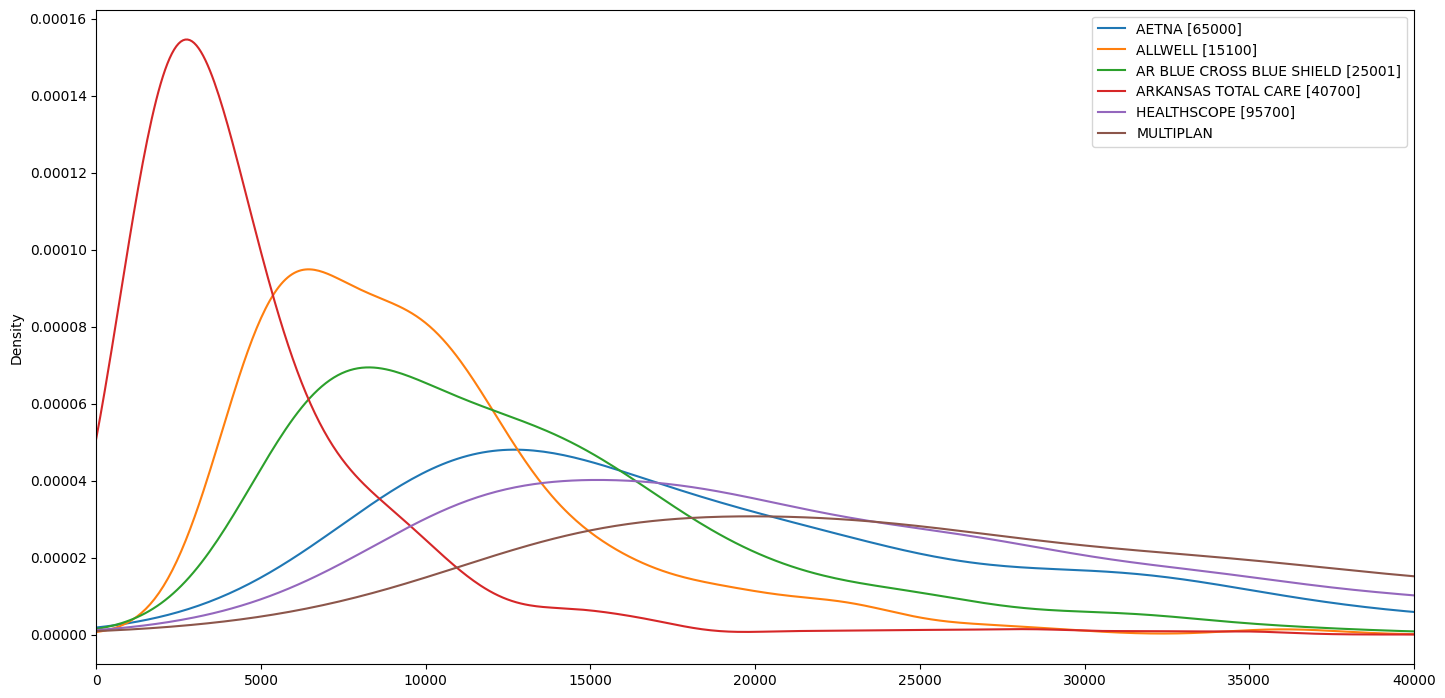

In [11]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


The KDE plot shows the total coverage distribution of different health insurance companies
1. Aetna and Arkansas Total Care exhibit a noticeable leftward shift in their high peaks.   It seems that most of the reimbursements for these plans fall on the lower end of the range.
2. Healthscope and Multoplan exhibit more uniform distributions with less pronounced peaks that cover a broader range of reimbursement amounts.   There is a greater degree of variability.
3. Allwell's peak is located on the far right side, with the majority of reimbursements falling within the range of $10,000 to $20,000.
4. AR Blue Cross Blue Shield exhibits a distribution that is primarily focused on the left side, similar to Aetna and Arkansas Total Care. However, it has a slightly elevated and broader peak ranging from $5,000 to $15,000.

Based on the patterns observed, it appears that
5. Aetna and Arkansas Total Care have managed to secure lower reimbursement rates on average in comparison to the other plans.   The distributions tend to be more focused on lower amounts.

6. Healthscope and Multoplan exhibit greater variability in reimbursements, displaying a more even distribution across a broader range of amounts.   It's possible that their discounted rates may vary between different services.

7. Allwell's distribution suggests that they have a tendency to provide higher reimbursements compared to other payers.   Their highest point is shifted the farthest to the right.

8. AR Blue Cross   Blue Shield appears to fall somewhere in the middle, with a slightly higher peak than Aetna and Arkansas. This suggests that, on average, Blue Shield offers slightly higher reimbursement.   However, the majority of the distribution still leans towards the left side.




---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

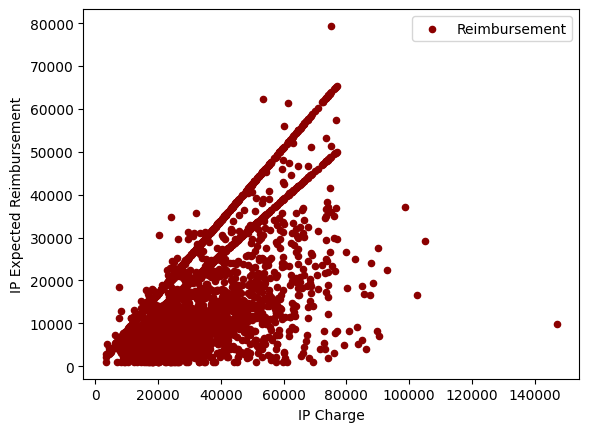

In [12]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

<ipython-input-13-7b284550e202>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (payer, prices) in enumerate(groups):


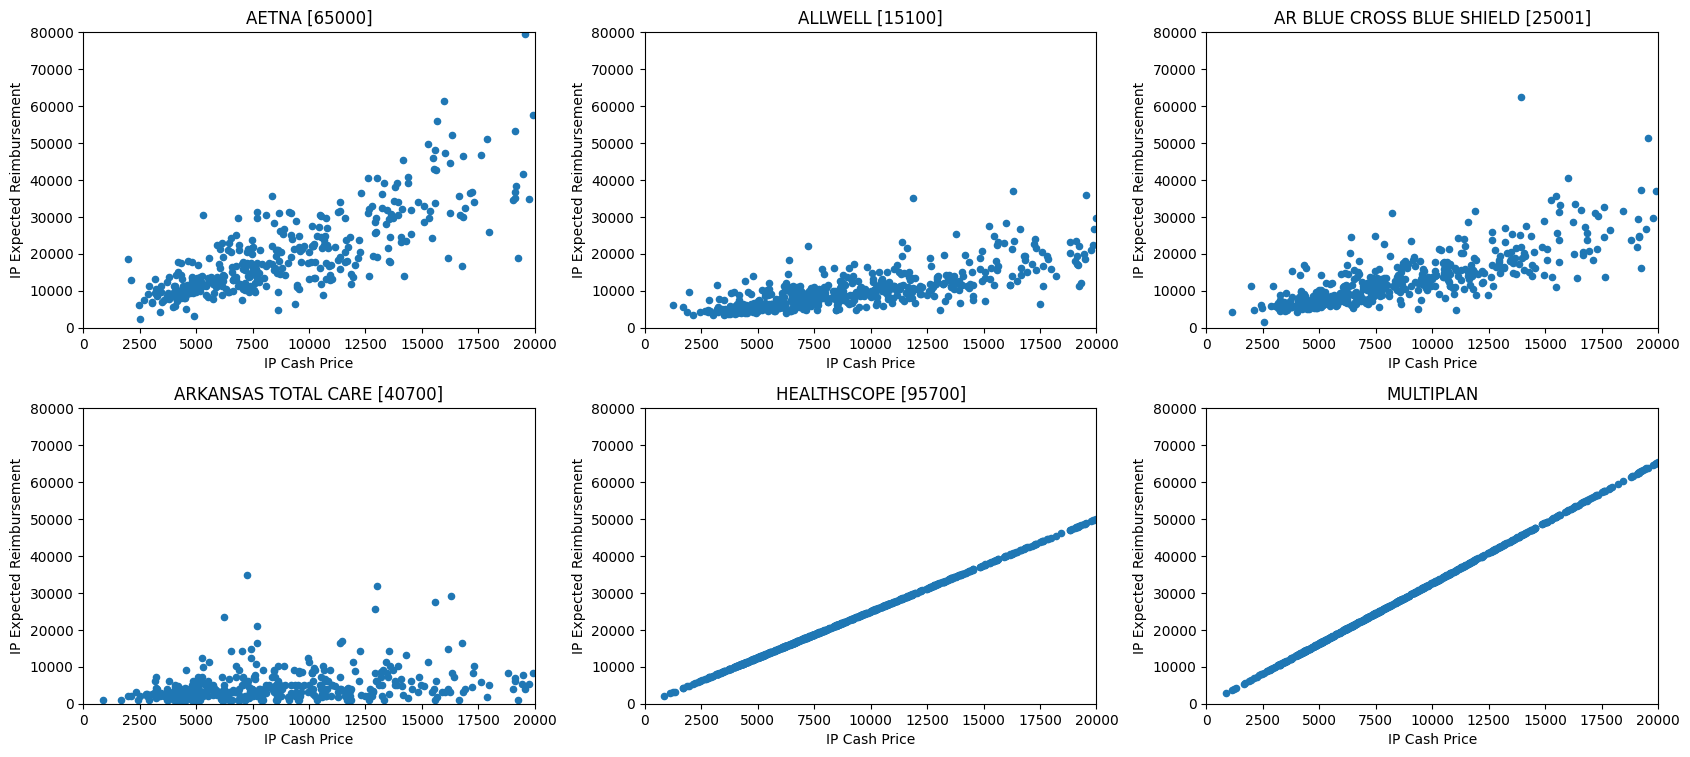

In [13]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

The scatterplots show no association between IP Cash Price and IP Expected Reimbursement. In contrast to a linear trend, the points are scattered. The cash price paid by patients does not strongly predict the insurance reimbursement. Reimbursement for cash prices varies greatly.

Reasons for the poor correlation:
1. Various insurance plans negotiate discounts and contractual pricing with providers. So plan reimbursement varies.
2. Despite the cash price, deductibles, copays, and other variable cost sharing considerations may affect service reimbursement.
3. Other than the service's base cash price, exclusions, previous authorizations, and network status can affect reimbursement.
4. The provider's underlying cost to supply different services may vary, affecting cash price but not insurance reimbursement.
5. IP Cash Price and insurance reimbursement are complicated. Although the cash price is a guide, reimbursement depends on plan details and cost sharing rules. More research is needed to understand reimbursement factors and cash price links. Scatterplots show wide unpredictability that is hard to predict.

Aetna: Points are uncorrelated and dispersed. Cash-price refunds vary.

Allwell—Clustering but weak connection. Many low reimbursements for large cash prices.

AR Blue Cross Blue Shield Dispersed and variable. There's no obvious link.

Arkansas Total Care—diffuse. Low reimbursements regardless of cash price.

Healthscope: Wide variance with low correlation. Unreliable reimbursements.

Multoplan plots are diffuse. No trend in reimbursements.


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [14]:
import pandas as pd

In [17]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [26]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
 print('User uploaded file "{name}" with length {length} bytes'.format(
     name=fn, length=len(uploaded[fn])))

Saving us_births_2016_2021.csv to us_births_2016_2021 (1).csv
User uploaded file "us_births_2016_2021 (1).csv" with length 416875 bytes


In [33]:
Us_Births = pd.read_csv("us_births_2016_2021.csv")

In [34]:
Us_Births

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0


In [47]:
Us_Births.info

<bound method DataFrame.info of         State State Abbreviation  Year Gender  \
0     Alabama                 AL  2016      F   
1     Alabama                 AL  2016      F   
2     Alabama                 AL  2016      F   
3     Alabama                 AL  2016      F   
4     Alabama                 AL  2016      F   
...       ...                ...   ...    ...   
5491  Wyoming                 WY  2021      M   
5492  Wyoming                 WY  2021      M   
5493  Wyoming                 WY  2021      M   
5494  Wyoming                 WY  2021      M   
5495  Wyoming                 WY  2021      M   

                              Education Level of Mother  Education Level Code  \
0                                     8th grade or less                     1   
1                9th through 12th grade with no diploma                     2   
2                 High school graduate or GED completed                     3   
3                 Some college credit, but not a degree

In [48]:
Us_Births.describe

<bound method NDFrame.describe of         State State Abbreviation  Year Gender  \
0     Alabama                 AL  2016      F   
1     Alabama                 AL  2016      F   
2     Alabama                 AL  2016      F   
3     Alabama                 AL  2016      F   
4     Alabama                 AL  2016      F   
...       ...                ...   ...    ...   
5491  Wyoming                 WY  2021      M   
5492  Wyoming                 WY  2021      M   
5493  Wyoming                 WY  2021      M   
5494  Wyoming                 WY  2021      M   
5495  Wyoming                 WY  2021      M   

                              Education Level of Mother  Education Level Code  \
0                                     8th grade or less                     1   
1                9th through 12th grade with no diploma                     2   
2                 High school graduate or GED completed                     3   
3                 Some college credit, but not a degr

# OBSERVATION 1
In the below plot, the 'Gender' variable is used as the label for the x-axis, and the 'Average Birth Weight (g)' variable is used as the label for the y-axis. This suggests that there is a plot that visualizes a relationship between 'Gender' (on the x-axis) and the 'Average Birth Weight (g)' (on the y-axis). Male babies tend to have higher average birth weights than female babies.

<Axes: xlabel='Gender', ylabel='Average Birth Weight (g)'>

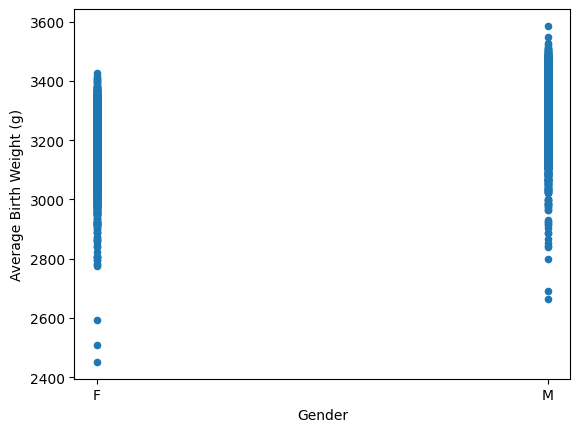

In [39]:
Us_Births.plot.scatter('Gender','Average Birth Weight (g)')

# OBSERVATION 2
In the below plot, Age is on the X-axis and the Number of Births is on the Y-axis

The plot suggests that women with lower and higher ages tend to have lower birth rates, while the highest birth rates are observed in the age group between 28 and 30, with women aged 30 years contributing to the highest number of births.

<Axes: >

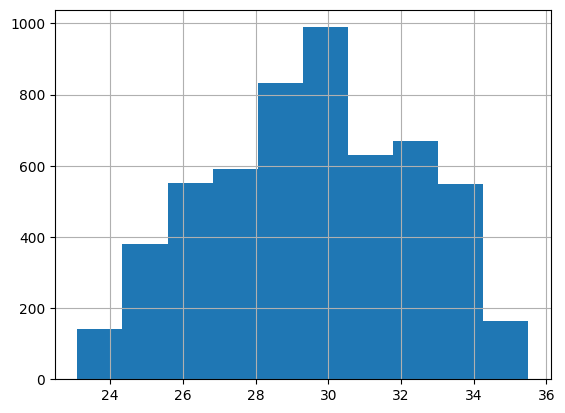

In [52]:
Us_Births['Average Age of Mother (years)'].hist()

# OBSERVATION 3
The histogram below illustrates the frequency distribution of the mean age of mothers who gave birth in the United States between 1910 and 2020.   Below are few salient features of this histogram:

* The data exhibits a distribution that closely resembles a normal distribution, with the highest point occurring between the ages of 27 and 29.   This indicates that the prevailing age for childbirth is typically in the late twenties.
* There is a significant decline in the number of births among moms below the age of 20 and above the age of 35.   This indicates that the occurrence of teenage pregnancies and births occurring at a later age is less frequent.
* The data has a minor rightward skew, indicating that older moms made a greater contribution to the number of births compared to younger mothers.   This is consistent with the prevailing pattern of women delaying childbirth.
* The complete distribution encompasses individuals aged 15 to 45, suggesting that although the majority of births are concentrated within a 10-year span, moms from a diverse range of ages have made contributions.


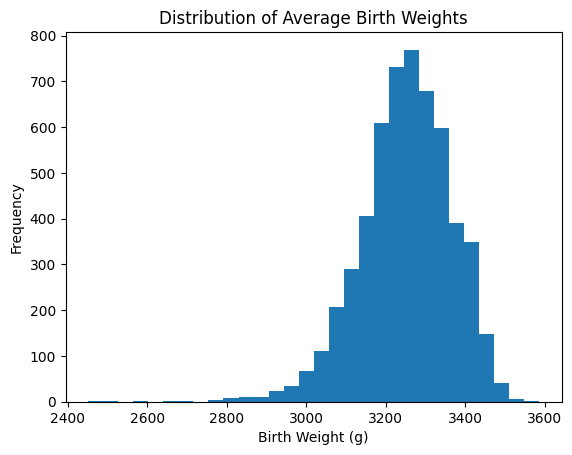

In [51]:
import matplotlib.pyplot as plt

# Extract the average birth weight column
bw = Us_Births['Average Birth Weight (g)']

# Plot histogram
plt.hist(bw, bins=30)

# Label plot
plt.xlabel('Birth Weight (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Birth Weights')

plt.show()



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option